<a href="https://colab.research.google.com/github/HimanshuKataria007/credit-scorecard/blob/main/credit_scorecard_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!pip install kaggle

In [112]:
from google.colab import files
files.upload()

{}

In [113]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [114]:
! pip install opendatasets

In [115]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data')

Skipping, found downloaded files in "./credit-risk-dataset" (use force=True to force download)


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, f1_score, recall_score, precision_score
!pip install optbinning
from optbinning import OptimalBinning

In [117]:
df = pd.read_csv("/content/credit-risk-dataset/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


dropping the duplicate values

In [120]:
df.drop_duplicates(inplace=True)

finding missing values and replacing or removing

In [121]:
missing_percentage=df.isnull().sum()/df.shape[0]*100
missing_percentage

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.736303
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.547754
loan_status,0.000000
loan_percent_income,0.000000


In [122]:
df.dropna(subset='person_emp_length',inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(),inplace=True)

In [123]:
missing_percentage=df.isnull().sum()/df.shape[0]*100
missing_percentage

,0
person_age,0.0
person_income,0.0
person_home_ownership,0.0
person_emp_length,0.0
loan_intent,0.0
loan_grade,0.0
loan_amnt,0.0
loan_int_rate,0.0
loan_status,0.0
loan_percent_income,0.0


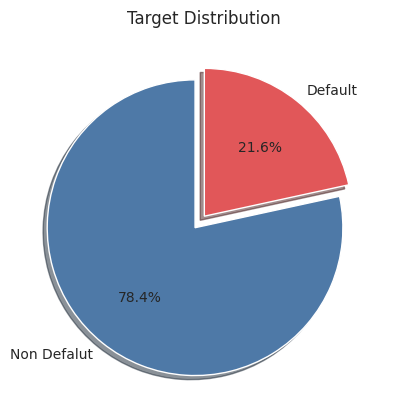

In [124]:
level_counts=df.loan_status.value_counts()
fig=plt.pie(x=level_counts,labels=['Non Defalut','Default'],colors=('#4E79A7','#E15759'),autopct='%1.1f%%',startangle=90,shadow=True,explode=(0.1,0))
plt.title('Target Distribution')
plt.show()

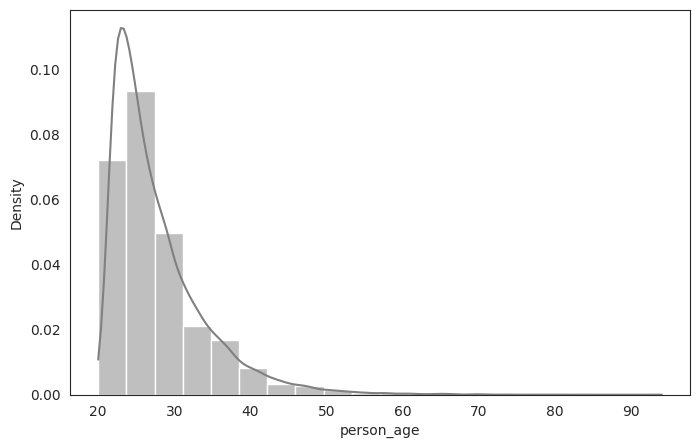

In [125]:
data_table = df[df['person_age'] < 100]

# Plot
plt.figure(figsize=(8, 5))
sns.set_style("white")
sns.histplot(data_table['person_age'], kde=True, stat="density", color="gray", bins=20, kde_kws={'bw_adjust': 1})
plt.xlabel('person_age')
plt.ylabel('Density')
plt.show()

In [126]:
import plotly.express as px

In [127]:
level_counts=df.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [128]:
level_counts=df.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [129]:
fig=px.histogram(df, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

In [130]:
fig=px.histogram(df, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

Now since we are done with the EOD, we will generate IV table and WOE

In [131]:
MAX_VAL = 999999999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, target, n_bins):
    X = data[[colname, target]]

    coltype = X[colname].dtype

    if coltype in ['float64', 'int64']:  # Use specific NumPy types
        optb = OptimalBinning(name='value', dtype="numerical", solver="cp", max_n_bins=n_bins)

        # Fit the model
        optb.fit(X[colname], X[target])

        # Get thresholds and convert to list
        thresholds = optb.splits.tolist()

        # Add item at the beginning and end
        thresholds.insert(0, MIN_VAL)
        thresholds.append(MAX_VAL)

        # Create bins
        bins, thres = pd.cut(X[colname], bins=thresholds, retbins=True, right=False)

        # Replace first and last thresholds of thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL

        X['bins'] = bins

    elif coltype == 'object':
        X['bins'] = X[colname]
        thres = None  # Set thres to None for object types

    # Create pivot tables
    df_GB = pd.pivot_table(X,
                            index='bins',
                            values = [target],
                            columns = [target],
                            aggfunc={target: np.size},
                            fill_value=0)

    df_Count = pd.pivot_table(X,
                               index='bins',
                               values=[target],
                               aggfunc=np.size,
                               fill_value=0)

    if coltype in ['float64', 'int64']:
        df_Thres = pd.DataFrame({'Thres': thres[1:]}, index=df_GB.index)
    else:
        df_Thres = pd.DataFrame(index=df_GB.index)

    df_Count.columns = ['Number of Obs']
    df_GB.columns = ['No hit', 'Hit']  # Ensure you have two columns to rename
    df_summary = df_Thres.join(df_Count).join(df_GB, how='outer')
    df_summary['Hit rate'] = df_summary['Hit']/df_summary['Number of Obs'].sum()
    df_summary['%Hit'] = df_summary['Hit']/df_summary['Hit'].sum()
    df_summary['%No hit'] = df_summary['No hit']/df_summary['No hit'].sum()
    df_summary['WOE'] = np.log(df_summary['%No hit']/df_summary['%Hit'])
    df_summary['IV'] = (df_summary['%No hit']-df_summary['%Hit'])*df_summary['WOE']
    df_summary['COLUMN'] = colname
    IV = df_summary['IV'].sum()
    print('Information Value of {} column: {}'.format(colname, IV))

    return df_summary, IV

# IV ranking
def _rank_IV(iv):
  if iv <= 0.02:
    return 'Useless'
  elif iv <= 0.1:
    return 'Weak'
  elif iv <= 0.3:
    return 'Medium'
  elif iv <= 0.5:
    return 'Strong'
  else:
    return 'Very Strong'

In [132]:
IV_list = []
var_list = []

data = df
target = 'loan_status'
var_columns = [i for i in df.columns.tolist() if i != target]
max_bins = 6

# Create a figure for all subplots
n_vars = len(var_columns)
num_columns = 3
num_rows = (len(df.columns) // num_columns) + (len(df.columns) % num_columns > 0)




# Loop through each VAR column and create a pivot table
for idx, var in enumerate(var_columns):
    if var in data.columns:  # Ensure the column exists in the dataframe
        if data[var].dtype == 'object':
            data[var].dropna(inplace= True)
            binning_table, IV = _bin_table(data = data, colname = var, target=target, n_bins = data[var].nunique())
            binning_table.sort_values(by= 'Hit rate', ascending = False, inplace= True)
        else:
            binning_table, IV = _bin_table(data = data, colname = var, target=target, n_bins = max_bins)

        IV_list.append(IV)
        var_list.append(var)

        # Calculate additional columns
        binning_table['TOTAL'] = binning_table['Number of Obs']
        binning_table['RATE'] = round(binning_table['Hit rate']* 100, 2)
        #pivot['%Blocked'] = round((pivot[2]) / pivot['TOTAL'] * 100, 2)
        binning_table[var] = binning_table.index.astype(str)  # Ensure categorical x-axis




# Generate IV df
IV_df = pd.DataFrame({'VAR': var_list, 'IV': IV_list})


IV_df['rank'] = IV_df['IV'].apply(lambda x: _rank_IV(x))
IV_df.sort_values('IV', ascending=False)

Information Value of person_age column: 0.010784986059902118
Information Value of person_income column: 0.519495515253489
Information Value of person_home_ownership column: 0.37374903098346224
Information Value of person_emp_length column: 0.06197855849473589
Information Value of loan_intent column: 0.09698445249091624
Information Value of loan_grade column: 0.9089692576751153
Information Value of loan_amnt column: 0.09583292300081214
Information Value of loan_int_rate column: 0.7071932107727369
Information Value of loan_percent_income column: 0.958683105313809
Information Value of cb_person_default_on_file column: 0.16924459834645156
Information Value of cb_person_cred_hist_length column: 0.005172147811430649


,VAR,IV,rank
8,loan_percent_income,0.958683,Very Strong
5,loan_grade,0.908969,Very Strong
7,loan_int_rate,0.707193,Very Strong
1,person_income,0.519496,Very Strong
2,person_home_ownership,0.373749,Strong
9,cb_person_default_on_file,0.169245,Medium
4,loan_intent,0.096984,Weak
6,loan_amnt,0.095833,Weak
3,person_emp_length,0.061979,Weak
0,person_age,0.010785,Useless


In [133]:
# Getting qualified features
qualified_features = IV_df[~IV_df['rank'].isin(['Weak', 'Useless'])]['VAR'].tolist()
categorical_cols = [i for i in qualified_features if df[i].dtype == 'object']
numeric_cols = [i for i in qualified_features if df[i].dtype != 'object']

In [134]:
df = pd.concat([df[qualified_features], df[target]], axis = 1)

In [135]:
WOE_dict = dict()
for col in qualified_features:
  if col != target:
    df_summary, IV,= _bin_table(data= df, colname=col,target = target,n_bins=max_bins)
    WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of person_income column: 0.519495515253489
Information Value of person_home_ownership column: 0.37374903098346224
Information Value of loan_grade column: 0.9089692576751153
Information Value of loan_int_rate column: 0.7071932107727369
Information Value of loan_percent_income column: 0.958683105313809
Information Value of cb_person_default_on_file column: 0.16924459834645156


In [136]:
# Converting predictor variables to WOE
for col in WOE_dict.keys():
  if col != target:
    try:
      key = list(WOE_dict[col]['table']['WOE'].index)
      woe = list(WOE_dict[col]['table']['WOE'])
      d = dict(zip(key, woe))
      col_woe = col+'_WOE'
      df[col_woe] = df[col].map(d)
    except:
      print(col)

In [137]:
X = df.filter(like='_WOE', axis = 1)
y = df[target]

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (25223, 6)
X_test shape:  (6306, 6)
y_train shape:  (25223,)
y_test shape:  (6306,)


In [138]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

# Tuning the model to find out the best
log_model = LogisticRegression()
clf = GridSearchCV(log_model,param_grid = param_grid, cv = 5, verbose=False,n_jobs=-1, scoring= 'f1')
best_clf = clf.fit(X_train,y_train)
best_clf.best_params_

{'C': np.float64(0.615848211066026),
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [139]:
best_model = best_clf.best_estimator_
# A function to return error metrics
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

def train_test_error(model, xtrain, xtest, ytrain, ytest):
    # The error on the training and test data sets
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    return pd.concat([measure_error(ytrain, y_train_pred, 'train'),
                              measure_error(ytest, y_test_pred, 'test')],
                              axis=1)
metric = train_test_error(best_model, X_train, X_test, y_train, y_test)
metric

,train,test
accuracy,0.877929,0.882493
recall,0.586118,0.597651
precision,0.794623,0.808342
f1,0.674627,0.687210


In [140]:
def _CreditScore(beta, alpha, woe, n = len(qualified_features), odds = len(df[df[target] == 1])/len(df[df[target] == 0]) , pdo = -20, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

# Alpha and intercept
betas_dict = dict(zip(list(X_train.columns), best_model.coef_[0]))
alpha = best_model.intercept_[0]

In [141]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in qualified_features:
  for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
      cols.append(col)
      # Add feature
      feature = str(feature)
      features.append(feature)
      # Add woe
      woe = woe.values[0]
      woes.append(woe)
      # Add beta
      col_woe = col+'_WOE'
      beta = betas_dict[col_woe]
      betas.append(beta)
      # Add score
      score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = len(qualified_features))
      scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE

,Columns,Features,WOE,Betas,Scores
0,person_income,"[-999999999999999.0, 24228.0)",-1.484807,-0.768882,67.508756
1,person_income,"[24228.0, 34999.5)",-0.875689,-0.768882,81.022199
2,person_income,"[34999.5, 39937.5)",-0.289963,-0.768882,94.016674
3,person_income,"[39937.5, 59982.0)",0.028544,-0.768882,101.082836
4,person_income,"[59982.0, 79993.5)",0.417326,-0.768882,109.708065
5,person_income,"[79993.5, 999999999999999.0)",1.011241,-0.768882,122.884214
6,person_home_ownership,MORTGAGE,0.656794,-0.958348,118.611317
7,person_home_ownership,OTHER,-0.495603,-0.958348,86.745129
8,person_home_ownership,OWN,1.305970,-0.958348,136.562370
9,person_home_ownership,RENT,-0.494858,-0.958348,86.765726


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [142]:
test_obs = df[qualified_features].iloc[0:1, :]
test_obs

,person_income,person_home_ownership,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file
0,59000,RENT,D,16.02,0.59,Y


In [145]:
def _search_score(obs, col):
  feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
  score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
  return score

# Score at a specific feeature
test_feature = 'loan_int_rate'
score = _search_score(test_obs, test_feature)
print(f'The person with {test_feature} of {test_obs[test_feature][0]} will recieve {score:.2f} in score.')

The person with loan_int_rate of 16.02 will recieve 94.16 in score.


In [146]:
scores

[np.float64(67.50875623135182),
 np.float64(81.02219881181007),
 np.float64(94.0166742562254),
 np.float64(101.08283574600192),
 np.float64(109.7080651929558),
 np.float64(122.88421410216831),
 np.float64(118.61131695878517),
 np.float64(86.74512912047237),
 np.float64(136.56236997938925),
 np.float64(86.76572635295145),
 np.float64(131.25651227379652),
 np.float64(112.40488571755242),
 np.float64(102.9472572095357),
 np.float64(47.51796317316274),
 np.float64(40.08688304747435),
 np.float64(31.161676659012365),
 np.float64(-74.38154171846523),
 np.float64(106.12583778791135),
 np.float64(103.46120448146941),
 np.float64(101.33406456218268),
 np.float64(99.97640160305262),
 np.float64(96.2943310892254),
 np.float64(94.16112794462603),
 np.float64(124.77595983795447),
 np.float64(118.67941671868041),
 np.float64(106.56014131649012),
 np.float64(94.15266947382024),
 np.float64(40.06591976981407),
 np.float64(33.69890470620023),
 np.float64(100.39337256640229),
 np.float64(100.65103177856

In [147]:
def _total_score(obs, columns = qualified_features):
  scores = dict()
  for col in columns:
    scores[col] = _search_score(obs, col)
  total_score = sum(scores.values())
  return scores, total_score

scores, total_score = _total_score(test_obs)
print(f'Score for each feature:\n{scores}')
print(f'Final total score: {total_score}')

Score for each feature:
{'person_income': np.float64(101.08283574600192), 'person_home_ownership': np.float64(86.76572635295145), 'loan_grade': np.float64(47.51796317316274), 'loan_int_rate': np.float64(94.16112794462603), 'loan_percent_income': np.float64(33.69890470620023), 'cb_person_default_on_file': np.float64(100.6510317785601)}
Final total score: 463.8775897015024


In [148]:
total_scores = []
for i in np.arange(df[qualified_features].shape[0]):
  obs = df[qualified_features].iloc[i:(i+1), :]
  _, score = _total_score(obs)
  total_scores.append(score)
df['Score'] = total_scores

df_train = df[df.index.isin(y_train.index)]
df_test = df[df.index.isin(y_test.index)]

In [149]:
total_scores

[np.float64(463.8775897015024),
 np.float64(636.8828657755588),
 np.float64(523.1360092753279),
 np.float64(529.8076571172709),
 np.float64(525.122157396302),
 np.float64(645.7423568488994),
 np.float64(544.3050190982449),
 np.float64(544.3050190982449),
 np.float64(578.4599344829882),
 np.float64(554.8369343560216),
 np.float64(557.4811680074573),
 np.float64(572.8811202386095),
 np.float64(584.826949546602),
 np.float64(484.3572437834365),
 np.float64(638.9136992506081),
 np.float64(680.4038137450453),
 np.float64(638.9136992506081),
 np.float64(475.4320373949745),
 np.float64(491.78832390912487),
 np.float64(606.8125373527645),
 np.float64(651.321171093278),
 np.float64(551.1091245422704),
 np.float64(472.2451599362985),
 np.float64(657.8616322510896),
 np.float64(487.8121712022682),
 np.float64(534.8473905902281),
 np.float64(454.71802066699763),
 np.float64(657.8616322510896),
 np.float64(544.3050190982449),
 np.float64(497.8944957127867),
 np.float64(624.7635903733685),
 np.float

In [151]:
total_scores = np.array(total_scores)
y_true = np.array(df['loan_status'])

# Function to compute KS-statistic
def ks_statistic(y_true, y_pred_scores):
    fpr, tpr, _ = roc_curve(y_true, y_pred_scores)
    return max(tpr - fpr)

# Define threshold range
thresholds = np.linspace(total_scores.min(), total_scores.max(), 200)

# Collect metrics
results = {
    "threshold": [],
    "precision": [],
    "recall": [],
    "f1_score": [],
    "ks_stat": []
}

# Evaluate each threshold
for t in thresholds:
    y_pred = (total_scores >= t).astype(int)  # 1 = predicted good
    y_pred = 1 - y_pred  # flip because loan_status = 1 means bad
    results["threshold"].append(t)
    results["precision"].append(precision_score(y_true, y_pred, zero_division=0))
    results["recall"].append(recall_score(y_true, y_pred))
    results["f1_score"].append(f1_score(y_true, y_pred))
    results["ks_stat"].append(ks_statistic(y_true, total_scores >= t))

# Convert to DataFrame and get best threshold
metrics_df = pd.DataFrame(results)
best_idx = metrics_df['f1_score'].idxmax()
best_threshold = metrics_df.loc[best_idx, 'threshold']

print(f"✅ Best threshold using total_scores: {best_threshold:.2f}")
print(metrics_df.loc[best_idx])


✅ Best threshold using total_scores: 574.57
threshold    574.566542
precision      0.729062
recall         0.658490
f1_score       0.691981
ks_stat        0.000000
Name: 127, dtype: float64
